In [1]:
import numpy as np
import pandas as pd

# Load your dataset here
# For example, if your dataset is saved as a CSV file:
# df = pd.read_csv('your_dataset.csv')


In [59]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = r'D:/Academics/semester6/Machine-Leraning/Assignments/assignment-1-ml-algorithm-avengers/Mini-Project/Combined'

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = r'D:/Academics/semester6/Machine-Leraning/Assignments/assignment-1-ml-algorithm-avengers/Mini-Project/Combined/Train'

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = r'D:/Academics/semester6/Machine-Leraning/Assignments/assignment-1-ml-algorithm-avengers/Mini-Project/Combined/Test'

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


In [78]:
X_train

array([[ 0.9736077 , -0.1844755 , -0.2821974 , ...,  0.9775468 ,
        -0.1833646 , -0.2764387 ],
       [ 1.00564   , -0.1732591 , -0.2299191 , ...,  1.00105   ,
        -0.1642913 , -0.2210956 ],
       [ 0.784794  , -0.2597323 , -0.2317497 , ...,  0.6052588 ,
        -0.3292142 , -0.1952567 ],
       ...,
       [ 1.013856  , -0.08463204, -0.1833906 , ...,  1.012576  ,
        -0.1036466 , -0.1521443 ],
       [ 1.479893  , -0.4783501 , -0.1348317 , ...,  0.7175624 ,
        -0.1262066 , -0.1470366 ],
       [ 0.7170605 , -0.02063687, -0.1085871 , ...,  0.7644377 ,
        -0.2050919 , -0.02824738]])

In [7]:
# ... (previous code remains unchanged)

# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Reshape X_train, X_test to 2D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on the test set: 0.6527777777777778
Confusion Matrix:
[[ 3  3  3  3  0  0]
 [ 1  8  2  0  1  0]
 [ 4  3  3  1  0  1]
 [ 0  0  0 11  1  0]
 [ 1  0  0  1 10  0]
 [ 0  0  0  0  0 12]]


Confusion Matrix for Depth 2:
[[ 9  0  0  3  0  0]
 [12  0  0  0  0  0]
 [10  0  0  1  0  1]
 [ 1  0  0 11  0  0]
 [12  0  0  0  0  0]
 [ 0  0  0  0  0 12]]

Confusion Matrix for Depth 3:
[[ 0  0  5  3  4  0]
 [ 0  0  5  0  7  0]
 [ 0  0  6  1  4  1]
 [ 0  0  0 11  1  0]
 [ 0  0  1  0 11  0]
 [ 0  0  0  0  0 12]]

Confusion Matrix for Depth 4:
[[ 0  3  5  3  1  0]
 [ 0  8  3  0  1  0]
 [ 0  4  5  1  1  1]
 [ 0  0  0 11  1  0]
 [ 0  0  1  0 11  0]
 [ 0  0  0  0  0 12]]

Confusion Matrix for Depth 5:
[[ 4  2  3  3  0  0]
 [ 2  7  2  0  1  0]
 [ 5  3  2  1  0  1]
 [ 0  0  0 11  1  0]
 [ 2  0  0  0 10  0]
 [ 0  0  0  0  0 12]]

Confusion Matrix for Depth 6:
[[ 3  2  4  3  0  0]
 [ 1  7  3  0  1  0]
 [ 2  2  5  1  1  1]
 [ 0  0  1 11  0  0]
 [ 1  0  0  0 11  0]
 [ 0  0  0  0  0 12]]

Confusion Matrix for Depth 7:
[[ 3  3  3  3  0  0]
 [ 1  8  2  0  1  0]
 [ 4  3  2  2  0  1]
 [ 0  0  0 11  1  0]
 [ 1  0  0  2  9  0]
 [ 0  0  0  0  0 12]]

Confusion Matrix for Depth 8:
[[ 3  3  3  3  0  0]
 

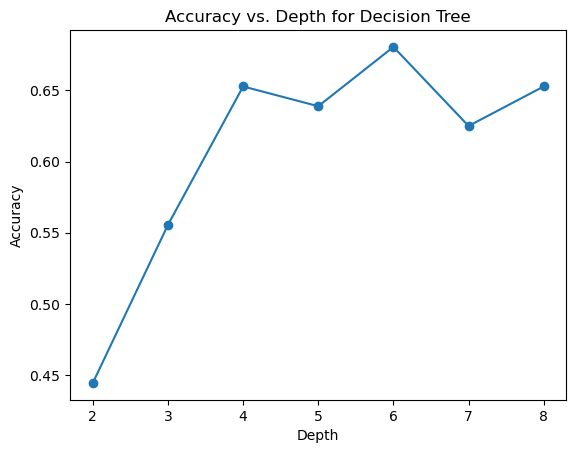

In [8]:
# ... (previous code remains unchanged)

# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Initialize lists to store accuracies for different depths
depths = list(range(2, 9))
accuracies = []

# Reshape X_train, X_test to 2D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Iterate over different depths
for depth in depths:
    # Train Decision Tree
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = dt_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print confusion matrix for each depth
    print(f"Confusion Matrix for Depth {depth}:")
    print(confusion_matrix(y_test, y_pred))
    print()

# Plotting accuracies vs. depths
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy vs. Depth for Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()


In [17]:
# ... (previous code remains unchanged)

# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Reshape X_train, X_test to 2D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy on the test set: 0.6527777777777778
Confusion Matrix:
[[ 3  3  3  3  0  0]
 [ 1  8  2  0  1  0]
 [ 4  3  3  1  0  1]
 [ 0  0  0 11  1  0]
 [ 1  0  0  1 10  0]
 [ 0  0  0  0  0 12]]


AttributeError: 'tuple' object has no attribute 'legend_elements'

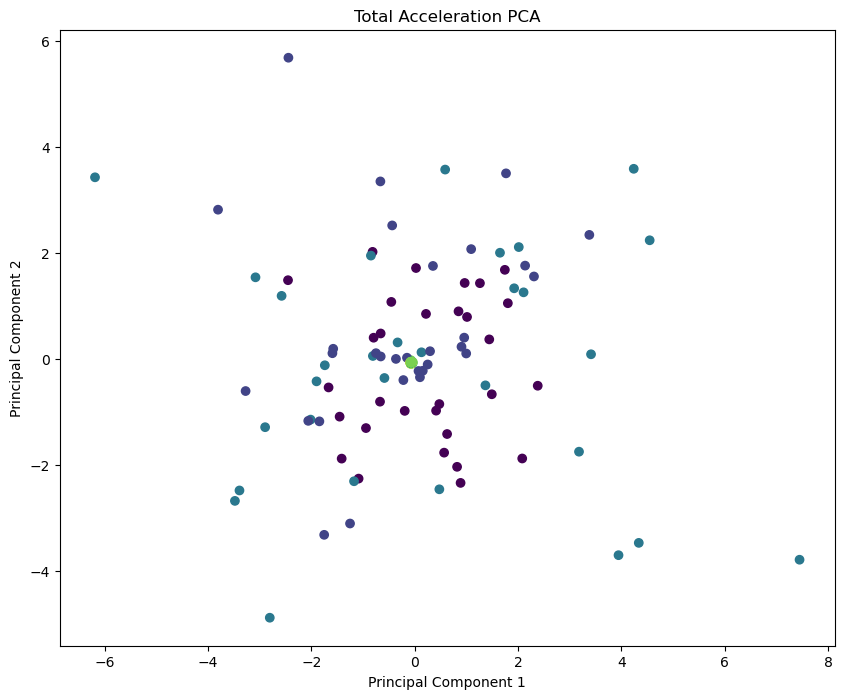

In [97]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Calculate total acceleration
total_acceleration = np.sqrt(X[:, :,0]**2 + X[:, :,1]**2 + X[:, :,2]**2)

total_acceleration_2d = total_acceleration.reshape(total_acceleration.shape[0], -1)

# Assuming you have activity labels in an array called activity_labels
# Replace this with your actual array or column name


# Perform PCA on Total Acceleration
pca = PCA(n_components=2)
total_acceleration_pca = pca.fit_transform(total_acceleration_2d)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(total_acceleration_pca[:, 0], total_acceleration_pca[:, 1], c=y,cmap = 'viridis'),
plt.title('Total Acceleration PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title= 'Classes')
plt.show()


In [99]:
X_test=[]
y_test=[]
dataset_dir = r'D:/Academics/semester6/Machine-Leraning/Assignments/assignment-1-ml-algorithm-avengers/Mini-Project/Combined/MyData'

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [101]:
# ... (previous code remains unchanged)

# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Reshape X_train, X_test to 2D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.3888888888888889
